In [14]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [15]:
from moara_for_qiskit import MoaraSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend

In [16]:
max_depth = 20
shot_count = 1

def getQiskitSimulator():
    return BasicAer.get_backend('qasm_simulator')
    #return Aer.get_backend('qasm_simulator')

def entanglerCX(circuit,n):
    for i in range(n-1):
        circuit.cx(i,i+1)

def RxRy(citrcuit,n):
    for i in range(n):
        citrcuit.rx(np.pi/3,i)
        citrcuit.ry(np.pi/5,i)

def XY(citrcuit,n):
    for i in range(n):
        citrcuit.x(i)
        citrcuit.y(i)

In [17]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range(j):
        #entanglerCX(qc,i)
        RxRy(qc,i)
        #XY(qc,i)
    qc.measure(range(i), range(i))
    return qc

In [18]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(10,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_qc)
            a.get('0'*i,0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [19]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌─────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────┐┌─┐   »
q_0: ┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/3) ├┤ RY(π/5) ├┤M├───»
     ├─────────┤├─────────┤├─────────┤├─────────┤├─────────┤├─────────┤└╥┘┌─┐»
q_1: ┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/3) ├┤ RY(π/5) ├─╫─┤M├»
     ├─────────┤├─────────┤├─────────┤├─────────┤├─────────┤├─────────┤ ║ └╥┘»
q_2: ┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/3) ├┤ RY(π/5) ├─╫──╫─»
     └─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘ ║  ║ »
c: 3/═══════════════════════════════════════════════════════════════════╩══╩═»
                                                                        0  1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c: 3/═╩═
«      2

In [20]:
simulator = getQiskitSimulator()
result = execute(qc, simulator, shots=1024)
print(result.result().get_counts())

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
result2 = execute(qc, simulator2, shots=1024)
print(result2)

{'111': 698, '000': 4, '101': 83, '110': 94, '011': 103, '010': 14, '001': 12, '100': 16}
{'001': 17, '101': 107, '110': 118, '111': 663, '011': 88, '100': 19, '010': 12}


In [21]:
def exec_func(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)

simulator=getQiskitSimulator()
depth=bench(simulator,max_depth, exec_func)
print(depth)

[44, 37, 31, 24, 21, 11, 6, 3, 2, 2]


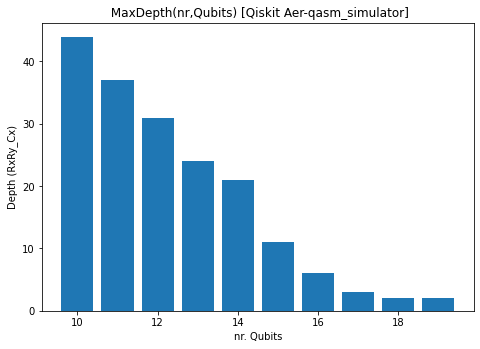

In [22]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(10,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [23]:
def exec_func2(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count)

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
depth2=bench(simulator2, max_depth, exec_func2)
print(depth2)

[100, 100, 100, 100, 100, 74, 38, 21, 13, 6]


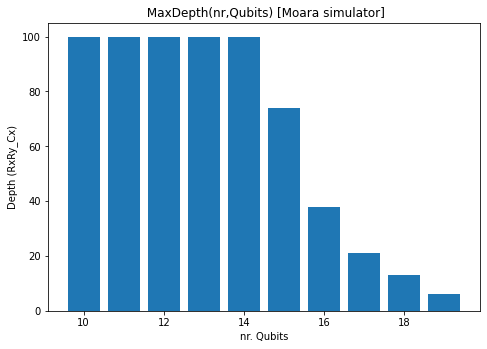

In [24]:
simulator_name2='Moara simulator'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(10,max_depth)]
ax.bar(langs,depth2)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name2+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [25]:
i=20
j=80
circ=test(i,j)
from moara_for_qiskit import MoaraSimulator
sim = MoaraSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

14.40531849861145


In [26]:
i=20
j=80
circ=test(i,j)

sim = getQiskitSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

95.83559918403625
